In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import PrecisionRecallDisplay

#score/results
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# from sklearn.metrics import plot_confusion_matrix -> Plot_Confusion_Matrix is deprecated
from sklearn.metrics import ConfusionMatrixDisplay

import tkinter
import matplotlib

In [123]:
def evaluateBinaryClassification(predictions, actuals):
    print("Predictions", predictions)
    print("Actual", actuals)
    contigency = pd.crosstab(actuals,predictions)
    print("Contigency", contigency)
    TP = contigency[1][1]
    TN = contigency[0][0]
    FP = contigency[1][0]
    FN = contigency[0][1]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    FScore = 2*Recall*Precision/(Recall+Precision)
    
    return Acuracy, Recall, Precision, FScore

#Read data

In [124]:
# Read data with a different encoding (Due to the presence of special characters)
df_agg = pd.read_csv('HMAGLOFDB_removed.csv', encoding='latin1')
df_agg.head()

,GF_ID,Year_approx,Year_exact,Month,Day,Lake_name,Glacier_name,GL_ID,LakeDB_ID,G_ID,...,Residential_damaged,Commercial_damaged,Infra,Agricultural,Hydropower,Econ_damage,Ref_scientific,Ref_other,Removal_reason,Certainty
0,1,1915,1915.0,NaN,NaN,Balthar,Balthar,G074464E36458N,NaN,ephemeral,...,NaN,NaN,NaN,NaN,NaN,NaN,"Bazai et al., 2021",NaN,Only a surge,0
1,2,1976,1976.0,NaN,NaN,Khurdopin,Khurdopin,G075438E36192N,NaN,ephemeral,...,NaN,NaN,NaN,NaN,NaN,NaN,"Iturrizaga, 2005",NaN,No evidence anywhere else,0
2,3,1993,1993.0,NaN,NaN,Chateboi,Chateboi,G073888E36780N,NaN,G073888E36780N,...,NaN,NaN,NaN,NaN,NaN,NaN,"Iturrizaga, 2005",NaN,No definite evidence,1
3,4,1929,1929.0,NaN,NaN,Kyagar,Kyagar,G077158E35562N,NaN,ephemeral,...,NaN,NaN,NaN,NaN,NaN,NaN,"Bazai et al., 2021",NaN,Not found in the original source of Desio (193...,1
4,5,1963,1963.0,9.0,16.0,Kyagar,Kyagar,G077158E35562N,NaN,ephemeral,...,NaN,NaN,NaN,NaN,NaN,NaN,Carrivick & Tweed (2016),NaN,"Wrong inclusion in that paper, can not be foun...",0


In [125]:
"""
Data Preprocessing
"""
# Dropping the columns Year_exact, Month, Day
columns_to_drop = ['Year_exact', 'Month', 'Day']

# Drop the specified columns
df_agg.drop(columns=columns_to_drop, inplace=True)
df_agg.head()

,GF_ID,Year_approx,Lake_name,Glacier_name,GL_ID,LakeDB_ID,G_ID,Lat_lake,Lon_lake,Elev_lake,...,Residential_damaged,Commercial_damaged,Infra,Agricultural,Hydropower,Econ_damage,Ref_scientific,Ref_other,Removal_reason,Certainty
0,1,1915,Balthar,Balthar,G074464E36458N,NaN,ephemeral,36.465000,74.348000,3220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Bazai et al., 2021",NaN,Only a surge,0
1,2,1976,Khurdopin,Khurdopin,G075438E36192N,NaN,ephemeral,36.344239,75.474953,3482.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Iturrizaga, 2005",NaN,No evidence anywhere else,0
2,3,1993,Chateboi,Chateboi,G073888E36780N,NaN,G073888E36780N,36.845730,73.899040,3680.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Iturrizaga, 2005",NaN,No definite evidence,1
3,4,1929,Kyagar,Kyagar,G077158E35562N,NaN,ephemeral,35.677371,77.190788,4880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Bazai et al., 2021",NaN,Not found in the original source of Desio (193...,1
4,5,1963,Kyagar,Kyagar,G077158E35562N,NaN,ephemeral,35.677371,77.190788,4880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Carrivick & Tweed (2016),NaN,"Wrong inclusion in that paper, can not be foun...",0


In [126]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GF_ID                   101 non-null    int64  
 1   Year_approx             86 non-null     object 
 2   Lake_name               66 non-null     object 
 3   Glacier_name            74 non-null     object 
 4   GL_ID                   29 non-null     object 
 5   LakeDB_ID               2 non-null      object 
 6   G_ID                    29 non-null     object 
 7   Lat_lake                88 non-null     float64
 8   Lon_lake                88 non-null     float64
 9   Elev_lake               78 non-null     float64
 10  Lat_impact              3 non-null      float64
 11  Lon_impact              3 non-null      float64
 12  Elev_impact             3 non-null      float64
 13  Impact_type             3 non-null      object 
 14  Lake_type               92 non-null     ob

In [127]:
# Remove the column: But this is an extreme case and should only be used when there are many null values in the column.
# Columns to keep
columns_to_keep = ['Lake_type', 'Lat_lake', 'Lon_lake', 'Elev_lake', 'Lake_name', 'Glacier_name', 'Impact_type', 
                   'Transboundary', 'Driver_lake', 'Driver_GLOF', 'Mechanism', 'Area', 'Volume', 'Impact', 
                   'Econ_damage']

# Drop all columns except the ones in columns_to_keep
df_cleaned = df_agg.drop(columns=df_agg.columns.difference(columns_to_keep), inplace=False)

# Now df_cleaned contains only the specified columns
df_cleaned.head()


,Lake_name,Glacier_name,Lat_lake,Lon_lake,Elev_lake,Impact_type,Lake_type,Transboundary,Driver_lake,Driver_GLOF,Mechanism,Area,Volume,Impact,Econ_damage
0,Balthar,Balthar,36.465000,74.348000,3220.0,NaN,Ice Dammed,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Khurdopin,Khurdopin,36.344239,75.474953,3482.0,NaN,Ice Dammed,N,surging glacier,NaN,NaN,NaN,NaN,NaN,NaN
2,Chateboi,Chateboi,36.845730,73.899040,3680.0,NaN,Ice Dammed,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kyagar,Kyagar,35.677371,77.190788,4880.0,NaN,Ice Dammed,N,surging glacier,NaN,NaN,NaN,NaN,NaN,NaN
4,Kyagar,Kyagar,35.677371,77.190788,4880.0,NaN,Ice Dammed,N,surging glacier,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lake_name      66 non-null     object 
 1   Glacier_name   74 non-null     object 
 2   Lat_lake       88 non-null     float64
 3   Lon_lake       88 non-null     float64
 4   Elev_lake      78 non-null     float64
 5   Impact_type    3 non-null      object 
 6   Lake_type      92 non-null     object 
 7   Transboundary  48 non-null     object 
 8   Driver_lake    8 non-null      object 
 9   Driver_GLOF    3 non-null      object 
 10  Mechanism      7 non-null      object 
 11  Area           0 non-null      float64
 12  Volume         1 non-null      float64
 13  Impact         0 non-null      float64
 14  Econ_damage    0 non-null      float64
dtypes: float64(7), object(8)
memory usage: 12.0+ KB


Lake_type: The type of lake (e.g., moraine dammed, ice dammed) can provide insights into the stability and potential for sudden drainage of the lake, which are critical factors in GLOF occurrence.

In [129]:
# Handling missing values of the lake type: By filling it with mode
unique_Lake_type = df_agg['Lake_type'].unique()
# Print the unique elements
print("Unique elements(Before): ", unique_Lake_type)

# Calculate the mode of the 'Lake_type' column
mode_value = df_agg['Lake_type'].mode()[0]
# Fill NaN values with the mode value
df_agg['Lake_type'] = df_agg['Lake_type'].fillna(mode_value)

unique_Lake_type = df_agg['Lake_type'].unique()
print("Unique elements(After):", unique_Lake_type)



Unique elements(Before):  ['Ice Dammed' 'Moraine Dammed' nan 'Supraglacial']
Unique elements(After): ['Ice Dammed' 'Moraine Dammed' 'Supraglacial']


Lat_lake, Lon_lake: The geographical coordinates of the lake can help identify its location within the high mountain region, which is crucial for understanding the context and potential risks associated with GLOF events.

In [130]:
# Handling missing values of the Lat_lake & Lon_lake by finding the average of the coordinates specific to that country

# Now, missing latitude and longitude values are not filled with the average coordinates for each country
print("Null Values(Before): Lat_lake",df_agg['Lat_lake'].isnull().sum(), "Lon_lake",df_agg['Lon_lake'].isnull().sum())

# Group the DataFrame by 'Country' and calculate average coordinates
country_avg_coords = df_agg.groupby('Country')[['Lat_lake', 'Lon_lake']].mean()

# Iterate over each group and fill missing values with the corresponding average coordinates
for country, avg_coords in country_avg_coords.iterrows():
    # Get average coordinates for the current country
    avg_lat = avg_coords['Lat_lake']
    avg_lon = avg_coords['Lon_lake']
    
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing latitude and longitude values with the corresponding average coordinates
    df_agg.loc[country_rows.index, 'Lat_lake'] = country_rows['Lat_lake'].fillna(avg_lat)
    df_agg.loc[country_rows.index, 'Lon_lake'] = country_rows['Lon_lake'].fillna(avg_lon)

# Now, missing latitude and longitude values are filled with the average coordinates for each country
print("Null Values(After): Lat_lake",df_agg['Lat_lake'].isnull().sum(), "Lon_lake",df_agg['Lon_lake'].isnull().sum())


Null Values(Before): Lat_lake 13 Lon_lake 13
Null Values(After): Lat_lake 0 Lon_lake 0


Elev_lake: The elevation of the lake is important as higher elevation lakes may have different characteristics and risks compared to lower elevation ones. Higher elevation lakes might be more prone to rapid melting and sudden drainage events.

In [131]:

# Now, missing elevation values are not filled with the average coordinates for each country
print("Null Values(Before): Elev_lake",df_agg['Elev_lake'].isnull().sum())

"""
# Group the DataFrame by 'Glacier_name' and calculate average elevation for each glacier
glacier_avg_elev = df_agg.groupby('Glacier_name')[['Elev_lake']].mean()

# Iterate over each glacier and fill missing elevation values
for glacier, avg_elev in glacier_avg_elev.iterrows():
    # Filter rows for the current glacier
    glacier_rows = df_agg[df_agg['Glacier_name'] == glacier]
    
    # Fill missing elevation values with the average elevation for the current glacier
    df_agg.loc[glacier_rows.index, 'Elev_lake'] = glacier_rows['Elev_lake'].fillna(avg_elev)

# Now, missing elevation values are not filled with the average coordinates for each country
print("Null Values(In Between): Elev_lake",df_agg['Elev_lake'].isnull().sum())

# Group the DataFrame by 'Country' and calculate average elevation for each country
country_avg_elev = df_agg.groupby('Country')[['Elev_lake']].mean()

# Iterate over each country and fill missing elevation values
for country, avg_elev in country_avg_elev.iterrows():
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing elevation values with the average elevation for the current country
    df_agg.loc[country_rows.index, 'Elev_lake'] = country_rows['Elev_lake'].fillna(avg_elev)
"""

""" 
# Group the DataFrame by 'Glacier_name' and calculate average elevation for each glacier
glacier_avg_elevation = df_agg.groupby('Glacier_name')['Elev_lake'].mean()

# Group the DataFrame by 'Country' and calculate average elevation for each country
country_avg_elevation = df_agg.groupby('Country')['Elev_lake'].mean()

# Iterate over each row and fill missing elevation values
for index, row in df_agg.iterrows():
    if pd.isna(row['Elev_lake']):  # Check if elevation value is missing
        if pd.notna(row['Glacier_name']):  # Check if Glacier_name is available
            # Fill missing elevation with average elevation for the corresponding glacier
            df_agg.at[index, 'Elev_lake'] = glacier_avg_elevation[row['Glacier_name']]
        else:
            # Fill missing elevation with average elevation for the corresponding country
            df_agg.at[index, 'Elev_lake'] = country_avg_elevation[row['Country']]

# Now, missing elevation values are filled with the average elevations for each specific glacier or country
"""

# Group the DataFrame by 'Country' and calculate average coordinates
country_avg_elevation = df_agg.groupby('Country')[['Elev_lake']].mean()

# Iterate over each group and fill missing values with the corresponding average coordinates
for country, avg_elev in country_avg_elevation.iterrows():
    # Get average elevation for the current country
    avg_elevation = avg_elev['Elev_lake']
    
    # Filter rows for the current country
    country_rows = df_agg[df_agg['Country'] == country]
    
    # Fill missing latitude and longitude values with the corresponding average coordinates
    df_agg.loc[country_rows.index, 'Elev_lake'] = country_rows['Elev_lake'].fillna(avg_elevation)

# Now, missing elevation values are filled with the average elevations for each specific glacier or country
print("Null Values(After): Elev_lake",df_agg['Elev_lake'].isnull().sum())

Null Values(Before): Elev_lake 23
Null Values(After): Elev_lake 0


Impact_type: Understanding the quality of impact records (e.g., 'Observation' or 'Deposit') can help assess the severity and extent of past GLOF events, which in turn can inform predictions about future occurrences.

In [133]:
# Most of the values in Impact_type are Unknown/NA: So its better to remove the column
df_agg = df_agg.drop('Impact_type', axis=1)


Transboundary: Information about whether the impact of the GLOF is potentially transboundary can help in assessing broader risks and coordinating mitigation efforts across borders.

***Feature Selection***

In [132]:
"""  
The logic behind using correlation for feature selection is that good variables correlate highly with the target. 
If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, 
the model only needs one, as the second does not add additional information. 
"""
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df_agg.corr()

# Plotting the heat map
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot = True)

ValueError: could not convert string to float: 'Before 1966'

In [ ]:
from sklearn import svm

# Read data
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
""" 
PCA (Principal Component Analysis) is not a feature selection mechanism, 
as it does not select features based on their relevance to the target variable. 
Instead, PCA is a dimensionality reduction technique that transforms a set of correlated 
variables into a smaller set of uncorrelated variables, called principal components (PCs)
"""

from sklearn.decomposition import PCA
pca = PCA()
columns_to_use = len(X_train[1])
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

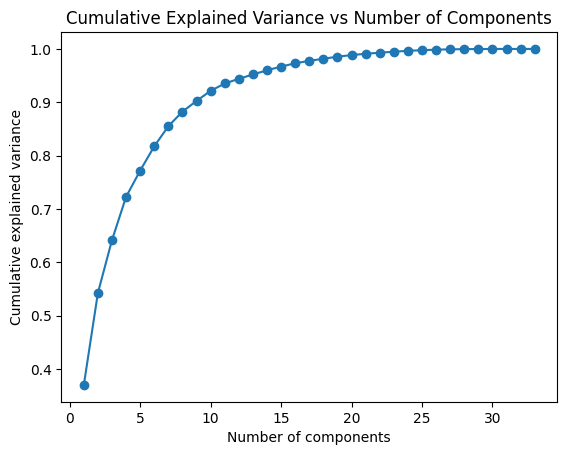

In [ ]:
# Plot the cumulative explained variance vs the number of components
plt.plot(range(1, columns_to_use + 1), cumsum, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.show()

In [ ]:
d = np.argmax(cumsum >= 0.95) + 1
"""  
The optimal number of principal components is reached when the cumulative variance stops growing fast:
We found that the number of dimensions can be reduced from 35 to 13 while preserving 95% of its variance. 
Hence, the compressed dataset is now 37% of its original size!
"""
# Create a PCA object with the desired number of components
pca = PCA(n_components=13)

# Fit the PCA object to the training data
pca.fit(X_train)

# Transform the training and testing data using the PCA object
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
print(X_train.shape)
print(y_train.shape)


(208, 33)
(208,)


In [ ]:
# Import python libraries required for building the classifier:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np


# Define the network model and its arguments. 
# Set the number of neurons/nodes for each layer:
model = Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid')) 

# Compile the model and calculate its accuracy:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) 
# Print a summary of the Keras model:
model.summary()


# clf = svm.SVC(kernel='rbf',C=30,gamma='auto')
# clf.fit(X_train, y_train)
# clf.score(X_test,y_test)

# # Predict
# y_pred = clf.predict(X_test)
# #print(y_pred)

2023-11-10 13:01:19.119234: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 13:01:19.556618: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 13:01:19.556688: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 13:01:19.558580: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 13:01:19.755947: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 13:01:19.758191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-10 13:01:25.321282: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-10 13:01:25.546973: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(33,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))



Epoch 1/150
21/21 [==============================] - 2s 6ms/step - loss: 0.7393 - accuracy: 0.3462
Epoch 2/150
21/21 [==============================] - 0s 8ms/step - loss: 0.5323 - accuracy: 0.8846
Epoch 3/150
21/21 [==============================] - 0s 10ms/step - loss: 0.3842 - accuracy: 0.8942
Epoch 4/150
21/21 [==============================] - 0s 7ms/step - loss: 0.3346 - accuracy: 0.8942
Epoch 5/150
21/21 [==============================] - 0s 7ms/step - loss: 0.3214 - accuracy: 0.8942
Epoch 6/150
21/21 [==============================] - 0s 6ms/step - loss: 0.3116 - accuracy: 0.8942
Epoch 7/150
21/21 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.8942
Epoch 8/150
21/21 [==============================] - 0s 5ms/step - loss: 0.2983 - accuracy: 0.8942
Epoch 9/150
21/21 [==============================] - 0s 5ms/step - loss: 0.2925 - accuracy: 0.8942
Epoch 10/150
21/21 [==============================] - 0s 6ms/step - loss: 0.2879 - accuracy: 0.8942
Epoch 11

In [ ]:
# make probability predictions with the model
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 9ms/step
[[1.76712558e-01]
 [7.86718354e-03]
 [2.81154573e-01]
 [1.72152315e-04]
 [1.28424749e-01]
 [1.94202978e-02]
 [5.54408431e-02]
 [1.67320929e-02]
 [6.47880734e-05]
 [8.96046753e-04]
 [2.55498178e-02]
 [1.74465794e-02]
 [9.87220556e-05]
 [2.02028126e-01]
 [7.83777535e-01]
 [2.77523428e-01]
 [6.81684911e-03]
 [8.12847611e-06]
 [6.27952977e-05]
 [9.32650045e-02]
 [1.37786984e-01]
 [1.79910840e-05]
 [1.71049978e-04]
 [1.20665445e-05]
 [1.65823458e-05]
 [3.81215066e-02]
 [1.79672686e-04]
 [5.28347399e-03]
 [1.94798037e-02]
 [2.74087638e-02]
 [9.40756220e-03]
 [6.72371238e-02]
 [1.27387175e-04]
 [1.41461939e-02]
 [4.53141481e-01]
 [9.75961208e-01]
 [4.44194581e-03]
 [6.01420179e-03]
 [3.67025167e-01]
 [4.08919863e-02]
 [3.93119687e-03]
 [2.93245306e-04]
 [9.52975377e-02]
 [1.49014301e-03]
 [2.38449709e-03]
 [3.33076387e-05]
 [2.36592609e-02]
 [9.26477253e-01]
 [2.38035977e-01]
 [1.73779597e-04]
 [2.38539070e-01]
 [8.28512202e-05]] [0 0 0 0 0 0

In [ ]:
# Performance Metrics

cm = confusion_matrix(y_test, y_pred)
# Create a confusion matrix using the confusion_matrix() function
print("Confusion Matrix:\n",cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))

print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))


cm = confusion_matrix(y_test, y_pred)
# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

ValueError: Classification metrics can't handle a mix of binary and continuous targets

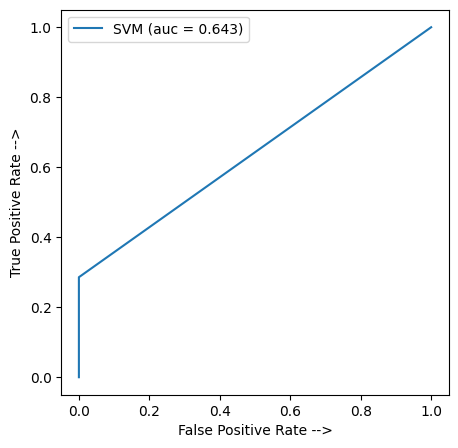

In [ ]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

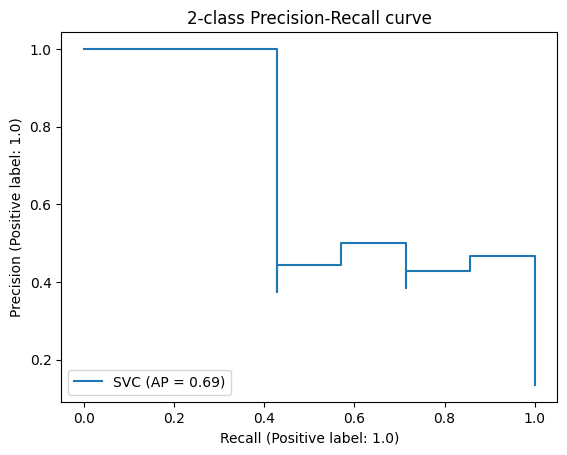

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Kfold Corss Validation

GridSearch CV

In [ ]:
"""      
Grid search CV is a technique used to find the optimal hyperparameters for a given model. 
It is a cross-validation technique that helps to determine the best values for hyperparameters of a model.
The performance of a model significantly depends on the value of hyperparameters. 
There is no way to know in advance the best values for hyperparameters, so ideally, 
we need to try all possible values to know the optimal values
"""

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, scoring=['recall','f1'],refit='f1',verbose=2)
clf.fit(X_test, y_test)
clf.cv_results_
y_pred = clf.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10,

Confusion Matrix:
 [[45  0]
 [ 1  6]]
Accuracy: 0.9807692307692307
Recall Score (Macro) 0.9285714285714286
Recall Score (Default) 0.8571428571428571
Precision Score (Macro) 0.9891304347826086
Precision Score (Default) 1.0
F1 Score (Macro): 0.956043956043956
F1 Score (Default): 0.923076923076923
ROC_AUC Score 0.9285714285714286


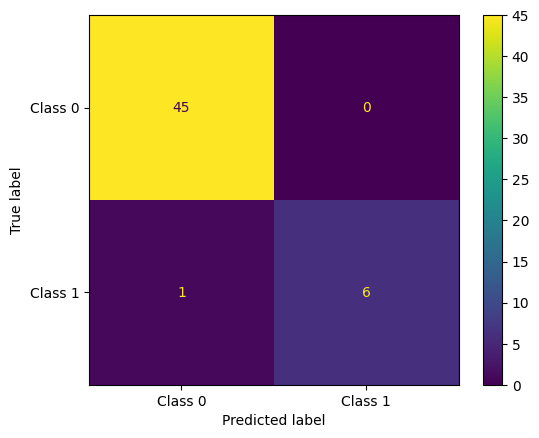

In [ ]:
# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))

cm = confusion_matrix(y_test, y_pred)

# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])

# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

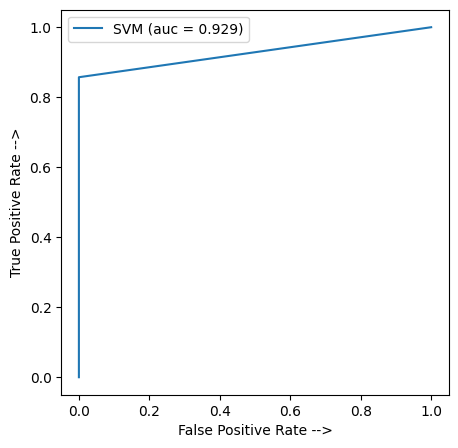

In [ ]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


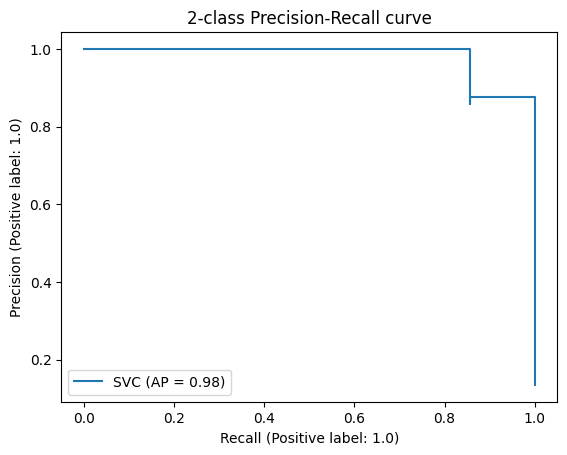

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_recall,split1_test_recall,split2_test_recall,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.003460,0.000543,0.018730,0.002613,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.0,0.0,0.0,...,0.000000,6,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,6
1,0.003606,0.000845,0.015265,0.001446,1,linear,"{'C': 1, 'kernel': 'linear'}",0.0,0.5,0.0,...,0.400000,3,0.0,0.666667,0.0,0.0,1.000000,0.333333,0.421637,3
2,0.004050,0.000954,0.013945,0.002519,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.0,0.5,0.0,...,0.400000,3,0.0,0.666667,0.0,0.0,1.000000,0.333333,0.421637,3
3,0.002338,0.000731,0.012549,0.001621,10,linear,"{'C': 10, 'kernel': 'linear'}",0.0,0.5,0.0,...,0.447214,1,0.0,0.666667,0.0,1.0,0.666667,0.466667,0.400000,1
4,0.003309,0.000989,0.010434,0.001303,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.0,0.5,0.0,...,0.400000,3,0.0,0.666667,0.0,0.0,1.000000,0.333333,0.421637,3
5,0.002733,0.001027,0.009033,0.000861,20,linear,"{'C': 20, 'kernel': 'linear'}",0.0,0.5,0.0,...,0.447214,1,0.0,0.666667,0.0,1.0,0.666667,0.466667,0.400000,1


randomizedSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, cv=5, scoring=['recall','f1'],refit='f1',verbose=2, n_iter=2
)
rs.fit(X_train, y_train)
y_pred = rs.predict(X_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ................................C=20, kernel=linear; total time=   0.0s
[CV] END ................................C=20, kernel=linear; total time=   0.0s
[CV] END ................................C=20, kernel=linear; total time=   0.0s
[CV] END ................................C=20, kernel=linear; total time=   0.0s
[CV] END ................................C=20, kernel=linear; total time=   0.0s


Confusion Matrix:
 [[45  0]
 [ 4  3]]
Accuracy: 0.9230769230769231
Recall Score (Macro) 0.7142857142857143
Recall Score (Default) 0.42857142857142855
Precision Score (Macro) 0.9591836734693877
Precision Score (Default) 1.0
F1 Score (Macro): 0.7787234042553192
F1 Score (Default): 0.6
ROC_AUC Score 0.7142857142857143


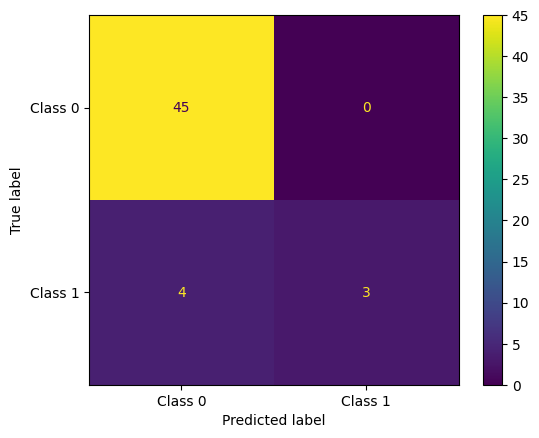

In [ ]:
# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))

cm = confusion_matrix(y_test, y_pred)

# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])

# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

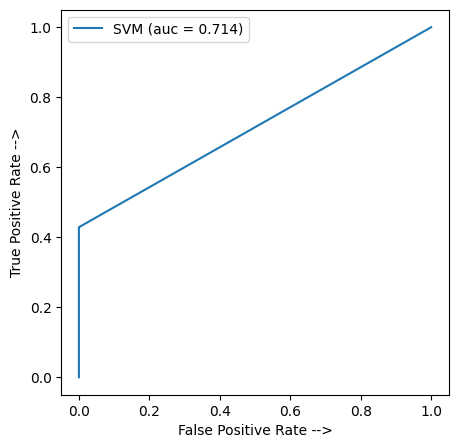

In [ ]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

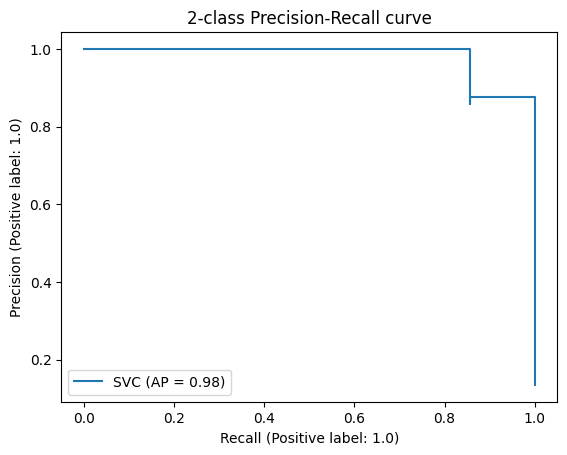

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")